<a href="https://colab.research.google.com/github/AndresUrregoAngel/CBB/blob/master/AI/Intro_AI/intra/IntraMLIntroduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Andres Urrego Angel


This Intra project will use a calls support dataset based on the primary language attention for immigrant people at use requesting for an interpreate service. The dataset contains data for the month of April for the years 2015,2016 and 2017.

**Predictions:**

* Linear Regresion to predict the minutes lenght of a call
* Classification to predict the language of a call

Here, is a quick description of the dataset columns.

* State: US state getting the call
* Language: Primary language for the caller
* Minutes: Call lenght based on minutes
* Month : Call month
* Year: Call year

In [2]:
import pandas as pd


df = pd.read_csv('https://raw.githubusercontent.com/AndresUrregoAngel/CBB/master/AI/Intro_AI/intra/MinutesInterpretateCall.csv',header=0)
df.head(n=5)


,State,Language,Minutes,Month,Year
0,Austin,Spanish,27.0,4,2015
1,Chicago,Polish,37.0,4,2015
2,Chicago,Spanish,27.0,4,2015
3,Chicago,Polish,10.0,4,2015
4,Chicago,Spanish,5.0,4,2015


The current dataset has two categorical predictors wich must be turn into numerical columns applying feature engineering , before feed the ML model which will accept exclusively numeric predictors. For this purpose I use a method within the library *Sklearn.preprocesing* called **LabelEncoder**. Since this point on, I will point out the new replacement columns as below:

* Language = language_encode
* State = state_encode

Now , this dataset could be ready to break down among predictors and target.

In [3]:
from sklearn.preprocessing import LabelEncoder

gle = LabelEncoder()
lngencoder = gle.fit_transform(df['Language'])
lngencoder_mp = {index: label for index, label in 
                  enumerate(gle.classes_)}

stencoder = gle.fit_transform(df['State'])

df['language_encode'] = lngencoder
df['state_encode'] = stencoder
df.head(n=5)

,State,Language,Minutes,Month,Year,language_encode,state_encode
0,Austin,Spanish,27.0,4,2015,42,5
1,Chicago,Polish,37.0,4,2015,34,14
2,Chicago,Spanish,27.0,4,2015,42,14
3,Chicago,Polish,10.0,4,2015,34,14
4,Chicago,Spanish,5.0,4,2015,42,14


**Goal: Predict the lenght time for a call according to an specific state, language and month.** In order to achieve this ideal preduction I have to break down properly my predictors and my target as below:

* Predictors: Month, Year, Language and State
* Target: Minutes

The first action then is create two new dataframes based on the description above.

In [0]:
X = df[['Month','Year','language_encode','state_encode']]
Y = df['Minutes']

I plot the two most important predictors versus our target to validate the linear correlation between these two , in order to guarantee the good pick over the ML model.


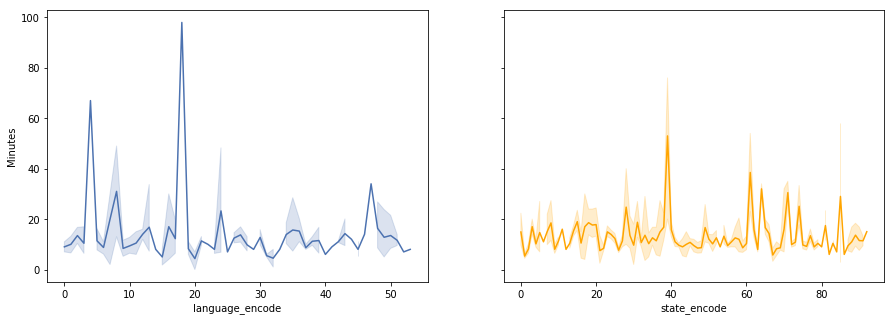

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(15,5))
sns.set_palette("deep")
sns.lineplot(x='language_encode',y='Minutes',data=df,ax=ax1)
sns.lineplot(x='state_encode',y='Minutes',data=df,ax=ax2,color="orange")
plt.show()


Before build any ML model I break down the datasets between the *test* and *training* chunks to feed the models and then check out the predictions. The same breaking data will work for both models

In [0]:
from sklearn.model_selection import train_test_split

# Split data 
X_train, X_test, y_train, y_test = train_test_split(X , Y , test_size=0.33,random_state = 33)


**Linear regression model**

In [0]:
from sklearn import datasets, linear_model

#Build model
model_lr = linear_model.LinearRegression()
model_lr.fit(X_train,y_train)

# Predictions for lr
pred_lr_y = model_lr.predict(X_test)

**Classification Decision Tree**

In [0]:
from sklearn import tree

#Build model
model_tree = tree.DecisionTreeClassifier(max_depth=2)
model_tree.fit(X_train,y_train)

#Predictions for classifier
pred_tree_y = model_tree.predict(X_test)

In [100]:
from sklearn import metrics

print(X_test.shape,y_test.shape)
print(model_lr.coef_)
print(metrics.mean_squared_error(y_test,pred_lr_y ,multioutput='raw_values'))

# plt.scatter(X_test , y_test)
# plt.plot(X_test, pred_lr_y  , linewidth=3)

# print(y_test.size
# ,pred_lr_y.size)

(1310, 4) (1310,)
[ 0.          0.29034754 -0.02889698 -0.02062413]
[138.30167124]
